## Interpretations and Evaluations

#### Xuechun Wang
#### hesterwang0514@gmail.com

In [74]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv("CRsample_user_data.csv", encoding = "utf-8")

In [5]:
dat.head()

,city,country,device_type,event_time,event_type,region,session_id,user_creation_time,user_id
0,New York,United States,Mac,2022-03-21 00:38:34.826000,Plugin - Not in Database,New York,1647823114552,2022-03-14 14:08:58.168000,4.057317e+11
1,New York,United States,Mac,2022-03-21 00:38:37.280000,Plugin - Not in Database,New York,1647823114552,2022-03-14 14:08:58.168000,4.057317e+11
2,New York,United States,Mac,2022-03-21 02:03:06.129000,Plugin - Not in Database,New York,1647828185874,2022-03-14 14:08:58.168000,4.057317e+11
3,New York,United States,Mac,2022-03-21 02:03:23.619000,Plugin - See Impact page,New York,1647828185874,2022-03-14 14:08:58.168000,4.057317e+11
4,New York,United States,Mac,2022-03-21 02:03:30.210000,Plugin - Click See Impact button,New York,1647828185874,2022-03-14 14:08:58.168000,4.057317e+11


### Part 1 

- what are the main insights from this user data? what are your recommendations for Changing Room

#### Impressions

The dataset has basic information about each individual access for changing room website, which benefits me to take further investigation on user with their purpose in accessing the website. Here, I assumed the "event time", one of the columns, as users' first access after they have created the accounts. Thus I can computed the time gap between the time they have created their account and the time they logged into the account, which helps me track the level of interest in browsing the website, and the possibility they would continuously invest their time on the website. Understanding the driving reasons of browsing the website may help find out current limiations, and broaden current customer bases. <br>

Meanwhile, the event type would state clearly the reason why users returned to the website, which provides potential in bettering the current website design. I will further investigate on it later when checking its distribution. <br>

For the main insights of the dataset, I will discuss from three perspectives, corresponding to the distribution of users, time gap of reviewing the website, and the purpose of browsing the website. <br>

In [36]:
print("Total Users:",dat['user_id'].nunique())
print("Count of records:", dat.shape[0])
print("The most frequent used User ID:", int(dat['user_id'].value_counts().idxmax()))

Total Users: 233
Count of records: 8266
The most frequent used User ID: 389698404053


In [95]:
print("Total number of countries:", dat['country'].nunique())
print("Whether city and region are the same:", dat['city'].equals(dat['region']))

Total number of countries: 22
Whether city and region are the same: False


Text(0.5, 0, 'Users Count in each country')

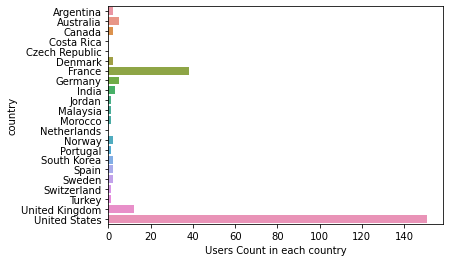

In [94]:
datUser = dat.groupby(['country'])['user_id'].nunique().reset_index(name = 'actual users')

# Initialize the seaborn figure
ax = sns.barplot(x = 'actual users', y = 'country', data = datUser, order = datUser['country'])
ax.set_xlabel('Users Count in each country')

In [100]:
crUS = dat[dat['country'] == 'United States']
crUS.groupby('city')['user_id'].nunique().reset_index(
    name = '# USERS').sort_values(
    '# USERS', ascending=False)

,city,# USERS
27,New York,84
6,Brooklyn,25
34,Queens,4
22,Los Angeles,4
40,Seattle,4
36,San Francisco,3
30,Philadelphia,3
25,New Haven,3
4,Berkeley,2
12,Cumming,2


#### 1.1 The distribution of users

When I have imported the dataset, the user demographic distribution attracts me the most to take a further investigation. To know about the target audiences is an essential step in keeping the current users and attract the future users. I have wondered in which countries, changing room has the largest user base, and what are the other potential countries that necessarily can be invested futher effort on. <br>

Therefore, I took a look on the unique number of users. There're 233 user ids in total, with over 140 come from United States, and France and United Kingdom are the following potential audiences. To zoom in the distribution of users in US, I have found that New York and Brooklyn compose the main sources of users. The website is less influensive and promoted in other cities beside them. The idea of sustainable behaviors have attracted attentions from limited number of people, therefore, we need find other similar future users based on characteristics of current users.

In [102]:
dat.groupby(
    ['country','user_id']).size().reset_index(
    name='Count').sort_values(
    ['country','Count'],ascending=[1,0]).groupby(
    'country').head(3)

,country,user_id,Count
0,Argentina,6.357298e+11,15
1,Argentina,7.269213e+11,8
4,Australia,6.456128e+11,14
5,Australia,7.172785e+11,7
3,Australia,4.814646e+11,6
7,Canada,7.555581e+11,25
8,Canada,8.924414e+11,12
9,Denmark,1.351190e+11,13
10,Denmark,8.725183e+11,7
24,France,2.982289e+11,88


#### 1.2 The frequent users in each country

From the above dataframe, I have permuted the top 3 frequent users in each country based on their times of browsing the website. Though there were 22 countries in total, the dataframe only showed 19 countries because of null information of user ids in some countries. <br>

The dataset has a relatively limited information about the current users, for example, I only obtained their ids, countries and cities, which make finding future users become harder. We need to have a image of specific target audiences, for example, who concerns the relationship between fashion and environment the most. Then, retaining these users, and encourage word of mouth promotions and social media promotions. With the influences of these people, to appeal people pay attention to the current issue. <br>

Therefore, the first recommendation will be to know about the users. Not only about their location, but their identity. Have a basic information on their profile, their age range, gender, ethinicity, career. To know about the reason that why they browse the website, are they identified as fashionist or environmentist, or any other reasons. It may hard to find out, but delivered mini survey (for example, ask the purpose when they want to know the rate of certain fabrics). These will attribute in finding a specific range of target audiences, and set corresponding strategy based on the information we have obtained. 

In [57]:
dateFormat = '%d/%m/%Y %H:%M:%S.%f'
dat['event_time'] = pd.to_datetime(dat['event_time'])
dat['user_creation_time'] = pd.to_datetime(dat['user_creation_time'])
dat['time_diff'] = dat['event_time'] - dat['user_creation_time']
dat['time_diff'] = dat['time_diff'].astype(str)
dat['date_diff'] = dat['time_diff'].str[:6]
dat['date_diff'].value_counts()

0 days    5536
8 days     369
5 days     207
1 days     181
6 days     178
7 days     130
17 day     109
2 days     108
4 days     106
19 day     102
20 day      97
21 day      88
31 day      83
13 day      81
3 days      69
25 day      68
9 days      62
26 day      61
12 day      60
15 day      55
24 day      53
23 day      51
22 day      47
18 day      46
14 day      43
10 day      41
35 day      35
33 day      32
32 day      31
37 day      26
36 day      25
16 day      22
11 day      20
27 day      18
28 day      16
-1 day       5
29 day       3
30 day       1
34 day       1
Name: date_diff, dtype: int64

In [106]:
freqDate = dat[dat['date_diff'] == '8 days']
freqDate.groupby('event_type')['user_id'].count().reset_index(name = "Count")

,event_type,Count
0,Plugin - Click See Impact button,38
1,Plugin - Footer click to Impact page,17
2,Plugin - Footer click to Profile page,6
3,Plugin - Footer click to Search History page,36
4,Plugin - Full Review click,6
5,Plugin - Log in page,0
6,Plugin - Not in Database,29
7,Plugin - Profile page,6
8,Plugin - Question mark Button click/How we rate,3
9,Plugin - RecommendationClicks,8


In [109]:
dat.groupby('user_id')['date_diff'].nunique().reset_index(name = "visit times")

,user_id,visit times
0,9.164397e+09,1
1,1.641719e+10,1
2,2.490490e+10,1
3,2.731604e+10,1
4,4.615528e+10,1
...,...,...
228,9.453536e+11,1
229,9.538784e+11,1
230,9.673507e+11,1
231,9.762455e+11,1


#### 2. Time gap of reviewing the websites

I was curious about when users would log into the account after they have created them. I found that typically they would immediately log in and browse the website from profiling the distribution of time gap. After 0 day, will they still back to the website? <br>

I found 8 days is the most frequent period when they choose to back to the website. To further look into users' purposes, I have tracking their behaviors on the website. I found "Search Item" obtain the maximum numbers of clicks, with "See impact page" as the second most. The users paid attention on the sustainability of clothes from knowing about their event type. <br>

Meanwhile, I wanted to check whether some users have frequently visited the website by finding out their second visit after the initial one. There's no record showing the second visit from the dataset. Thus, I would recommend to track every visit from each user, and have a general view about their frequency of browsing. Based on the frequency, we can possibly send an email to remind the functionality of the website and encourage them to visit again. What's more, by tracking their event, we can find out whether the website achieved its mission about promoting sustainability. 

In [29]:
dat['event_type'].value_counts()

Plugin - is pinned                                 1148
Plugin - Not in Database                            997
Plugin - Searched Item                              891
Plugin - See Impact page                            746
Plugin - Log in page                                672
Plugin - Click See Impact button                    547
Plugin - Footer click to Search History page        363
Plugin - Search History Page                        362
Plugin - Supported Brand Browsing                   354
Plugin - Footer click to Profile page               282
Plugin - Sign up page                               244
Plugin - Profile page                               233
Plugin - Log in error                               216
Plugin - Successful Registration                    194
Plugin - click on Current Brands Available          173
Plugin - Footer click to Impact page                159
Plugin - Full Review click                          158
Plugin - Question mark Button click/How we rate 

#### 3. The purpose of browsing the website

Finally, I took a look at the distribution of event type. "Is pinned" achieves the highest, following with "Not in database" and "Search Item". I actually obtained a blurred impression about the descriptions because I am not sure if they are exactly the same as I thought. I would recommend a full-described event-type version, or clear version, such as applying one-hot encoding on each event type and track each users' purposes. Meanwhile, the time duration for each event can be recorded for further application, such as the interested part. 

### Part 2

- if you could have more data, what features would you like to see on the data set?

If I could have more data, I would first change the general view of the dataset by transferring into a multi-index level based on user ids. Since there're 233 users with 8266 records, I would display information based on individual user for better visualization purpose. <br>

The features I would like to see is users' profile information, such as gender, ethnicity, age range, income level, etc., where I can cluster groups of users based their similar characteristics, and find out corresponding promotion strategies. What's more, the event start time and end time are also valuable in tracking user spend time and leveraging web design and user interface through their focus time. <br>

Meanwhile, I would extract and record their input contents on the website, and find out their preferences and frequent shopped brand. The brand they are shopping is somewhat related to their identity based on their age fact and income level. Thus we can categorize distribution of shopping habits of users, and come up with customized information filtering. For example, if they are buyers for fast fashion, the main page may display relative information of insustainability and cruel fact of fast fashion industry. 

### Part 3

- limitations on your analysis and further works?

My analysis is based on my assumptions of exploring inital access after users have created their accounts. I had no background information about the dataset, and was not familiar with the target audiences. My views were generally about profiling the distributions and looking into the specific numbers of users, which was relatively superficial compare to data modeling. 

The data exploration is relatively limited, and for future work, I would choose to set up metrics in evaluating the website, such as obtaining the rate of return of the users. Meanwhile, there's no response variable in the dataset, I would like to find out the variable to define the current performances. With the response variable, I can further build prediction model based on historical data and set up evaluation metrics on judging the model performance. The model will benefit on business decision making, and finding out interest facts that I have not paid attention before.  